### Python Reddit API Wrapper 설치

In [1]:
pip install praw

   ---------------------------------------- 0.0/191.0 kB ? eta -:--:--
   ------ -------------------------------- 30.7/191.0 kB 660.6 kB/s eta 0:00:01
   ------------------------------ --------- 143.4/191.0 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------- 191.0/191.0 kB 1.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


### PRW 임포팅
- PRW 관련 document : https://praw.readthedocs.io/en/latest/

In [1]:
import praw

### PRAW API를 통해 Reddit에 접근하는 사용자 등록
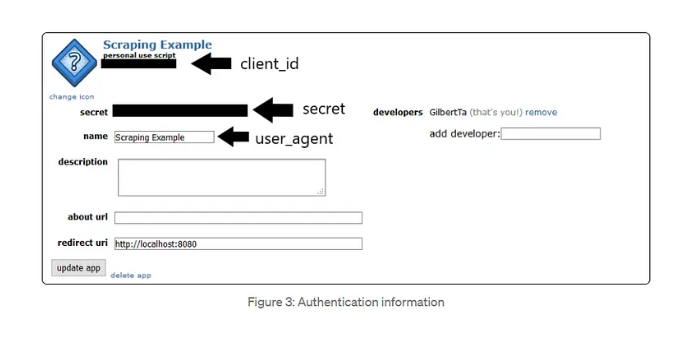

In [2]:
reddit = praw.Reddit(client_id = 'M_roK-pfID6N2s9P1IYGQA', client_secret = '1X2YHVxGMNmaInoYuhDQ-tUhwbWEXQ', user_agent = 'WebScraping')

### subreddit 선정해서 데이터 수집

In [3]:
# 데이터 프레임 형태로 분석 위한 pandas 모듈 임포팅
import pandas as pd

In [4]:
# unixt time 형태의 데이터를 UTC 기준 한국 표준시로 변환
from datetime import datetime, timezone, timedelta

def unix_to_kst(unix_time):
    # UTC 기준으로 datetime 객체 생성
    utc_time = datetime.fromtimestamp(unix_time, tz=timezone.utc)
    # 한국 표준시(KST)로 변환
    kst_time = utc_time.astimezone(timezone(timedelta(hours=9)))
    return kst_time

In [5]:
# 선정한 subbreddit에서 top(기간 설정은 All Time)으로 섹션을 분류하여 수집한 데이터를 빈 리스트에 저장
import time
from tqdm import tqdm

posts_list = []
subreddit = reddit.subreddit('RelationshipIndia')
for i, post in tqdm(enumerate(subreddit.top(limit=None))):
    posts_list.append([post.title, unix_to_kst(post.created_utc), post.link_flair_text, post.selftext])

998it [00:19, 51.83it/s]


In [6]:
# DataFrame 출력 형태 설정
pd.options.display.max_colwidth = 2000
pd.set_option('display.max_rows',None)

In [7]:
posts_pd = pd.DataFrame(posts_list, columns = ['title', 'created_utc', 'flair text', 'selftext'])
posts_pd
#posts_pd_align = posts_pd.style.set_properties(subset=['title','selftext'],**{'text-align':'left'})
#posts_pd_align

title  \
0                                                                                                                                                                                                                               I(28F) married my husband(28M) 4 years ago and now I love someone more than him   
1                                                                                                                                                                                                                                   23F always splits bills with my bf 22M and some of my friends find it weird   
2                                                                                                                                                                                                                                                        A random girl shared chips with me (25M) in a theater.   
3                                                                                                                                                                                                                                 My brother has handled the saas-bahu issues like a pro and I am proud of him.   
4                                                                       My wife 32F claims she would just pull the leg of a colleague 24M who openly expressed his crush on her and he would always compliment her. She says it's not cheating and she has no feelings on him . Please check one of their chats   
5                                                                                                                                                                                                                               My(29M) wife(27F) had a physical affair, and I don't know how to feel about it.   
6                                                                                                                                                                                                                                  29m and 27f "virgins" are getting married and I find the situation hilarious   
7                                                                                                                                                                                                                                           The Plane Girl: A Memorable Encounter between Me (20M) & her (22F)    
8                                                                                                                                                                                                                                  I (25M) hit the jackpot with my girlfriend (24F), she's seriously amazing.\n   
9                                                                                                                                                                                                                                                             Arranged marriages are scary, what if…. (I’m 24F)   
10                                                                                                                                                                                            Please don't lie about your past relationship during the AM setup. Story of a 34F(Not me but a friend of friend).   
11                                                                                                                                                                                                            I am so sick of looking at profiles on dating apps, I (23F) decided to make a guide for you boys.   
12                                                                                                                                                                                                                                         My( 25M) girlfriend (22F) is the best girlfriend in this whole world   


### 데이터 전처리

#### 1) flair 빈도수 확인

In [8]:
posts_pd['flair text'].value_counts()

flair text
Relationships         372
Marriage              189
Dating Advice         121
Rant                  100
Opinion/Discussion     70
Family                 43
Friendship             26
Update                 17
Romantic               11
Rant/Discussion         5
Official Post           1
Name: count, dtype: int64

#### 2) 대문자 전환

In [9]:
def lower_capital(row):
    return row.lower()

In [10]:
posts_pd['title'] = posts_pd['title'].apply(lower_capital)
#posts_pd['flair text'] = posts_pd['flair text'].apply(lower_capital)
posts_pd['selftext'] = posts_pd['selftext'].apply(lower_capital)
posts_pd

title  \
0                                                                                                                                                                                                                                                               what similar stories do you have  ? 🤔   
1                                                                                                                                                                                                                                                                          meet gus, our society cat!   
2                                                                                                                                                                                                                                             momo got scared in his own territory due to free kisses   
3                                                                                                                                                                                                                                                              why do people leave puppies like that.   
4                                                                                                                                                                                                                                                                                  should i keep joy?   
5                                                                                                                                                                                                                                                                     ello humans please stop working   
6                                                                                                                                                                                                                                                                       laila and some photo shoot 🍁💕   
7                                                                                                                                                                                                                                         india, the land of wonders, has a special place for dogs !    
8                                                                                                                                                                                                                                                                 caption this one, ladies and gents!   
9                                                                                                                                                                                                                                                                   what is chiku trying to say guys?   
10                                                                                                                                                                                                                                                                help bro learn complicated concepts   
11                                                                                                                                                                                                                                                                                                  🧿   
12                                                                                                                                                                                                                                                      this hardworking man won't sleep without ac.    
13                                                                                                                                

#### 3) 이모지 제거


In [11]:
# 입력받은 데이터가 아스키코드에 포함되어 있지 않으면 무시 후 반환
def rmEmoji_ascii(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [12]:
posts_pd['title'] = posts_pd['title'].apply(rmEmoji_ascii)
posts_pd['selftext'] = posts_pd['selftext'].apply(rmEmoji_ascii)

#### 4) NLTK로 토크나이징

In [41]:
# nltk 설치가 안되어있다면 아래 문장 주석 해제하고 설치
# !pip install nltk

In [13]:
# nltk 임포팅
import nltk

In [14]:
# 불용어 사전 불러오기
stopwords = nltk.corpus.stopwords.words('english')
#stopwords

In [15]:
# 불용어 제외 + 명사 추출 함수 
def extract_noun(string) :
    split_text = nltk.word_tokenize(string)
    tagged_text = nltk.pos_tag(split_text)
    words = [word for word, tag in tagged_text if tag in {'NN','NNS','NNP','NNPS'} if word not in stopwords] 
    return words

In [16]:
str_title = extract_noun(str(posts_pd['title']))
str_selftext = extract_noun(str(posts_pd['selftext']))

In [17]:
# 정규식 표현 위한 re 모듈 임포
import re

In [18]:
str_title_list = []
str_selftext_list = []

for str in str_title:
    if(re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str)==''):
        continue
    str_title_list.append(re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str))

for str in str_selftext:
    if(re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str)==''):
        continue
    str_selftext_list.append(re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str))

In [50]:
#str_title_list
#str_selftext_list

In [19]:
str_info = str_title_list+str_selftext_list
#str_info

### 데이터 분석

#### 1) 워드클라우드 시각화

In [20]:
# 워드클라우드 import
from wordcloud import WordCloud
# 워드를 카운팅해주는 라이브러리
from collections import Counter
# 데이터를 시각화 해주는 라이브러리
import matplotlib.pyplot as plt

In [21]:
count = Counter(str_info)
# count

In [22]:
wordcloud = WordCloud(font_path = 'C:\Windows\Fonts\HMKMRHD.TTF',
                      width = 700,
                      height = 700,
                      background_color = 'white',
                      colormap = 'spring',
                      random_state = 1).generate_from_frequencies(count)

<function matplotlib.pyplot.show(close=None, block=None)>

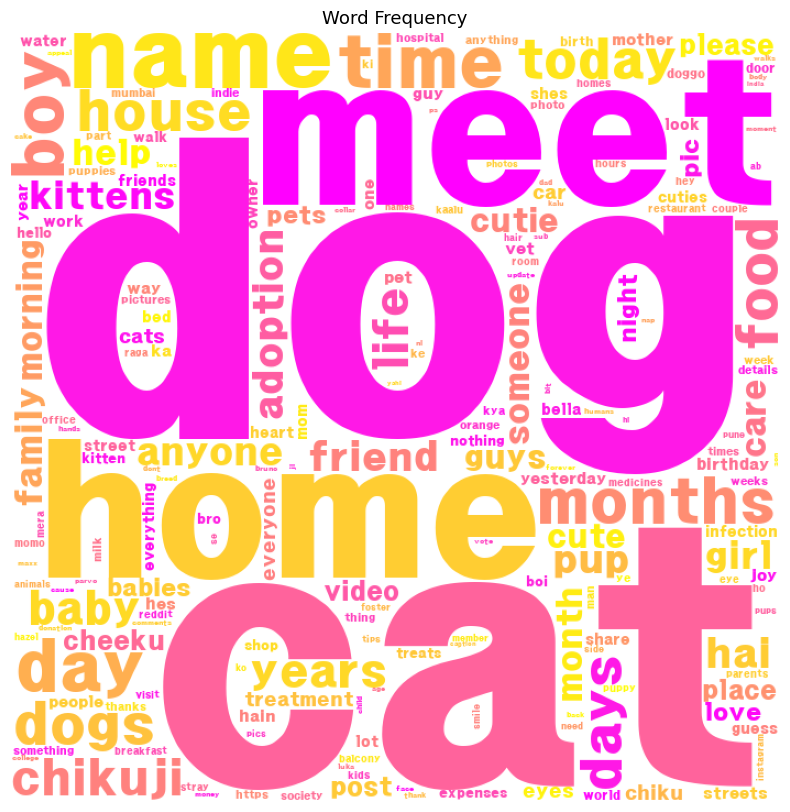

In [23]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Word Frequency", size = 13)
plt.show

#### 2) flair text로 나누어서 분석

In [24]:
posts_pd['flair text'].value_counts()

flair text
Photo/Video                 494
Adoption                     25
Discussion                   18
Help                         15
dog photo/vid :doge:         13
Vent                          7
cat photo/vid :cat_blep:      4
Behaviour                     3
Health                        2
Discussion :sloth:            1
Name: count, dtype: int64

In [25]:
# ask opinion, relationships, career, education, technology, personal advice, mental health
temp = posts_pd[posts_pd['flair text']=='Sports'].reset_index(drop=True)

In [27]:
temp

Empty DataFrame
Columns: [title, created_utc, flair text, selftext]
Index: []